In [ ]:
### Project 

In [35]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option("max_rows", 200)
pd.set_option("min_rows", 100)


In [2]:
### Data Load 
df_discount = pd.read_csv("discount.csv")
df_google_call = pd.read_csv("goog_call.csv")
df_googl_put = pd.read_csv("goog_put.csv")
start_date = dt.datetime(2013,8,30)
end_date = dt.datetime(2015,1,7)
time = end_date  - start_date
time

datetime.timedelta(days=495)

In [3]:
df_google_call.tail(2)

,date,expiry,strike,best_bid,best_offer
120,20130830,20150117,1360,5.5,7.8
121,20130830,20150117,1370,5.2,7.4


In [4]:
def payoffFunction ( Strike_Price):
    
    return (((Strike_Price)^3  * 10^(-8)) +  (0.5  * np.log(Strike_Price) +10))

def blackschole_stock_pricing( spot_price,risk_free_rate ,volatility,Time):
    return(np.exp(np.log(spot_price) + ( risk_free_rate - np.divide(np.square(volatility),2) * Time + np.multiply(volatility,np.sqrt(Time)))))

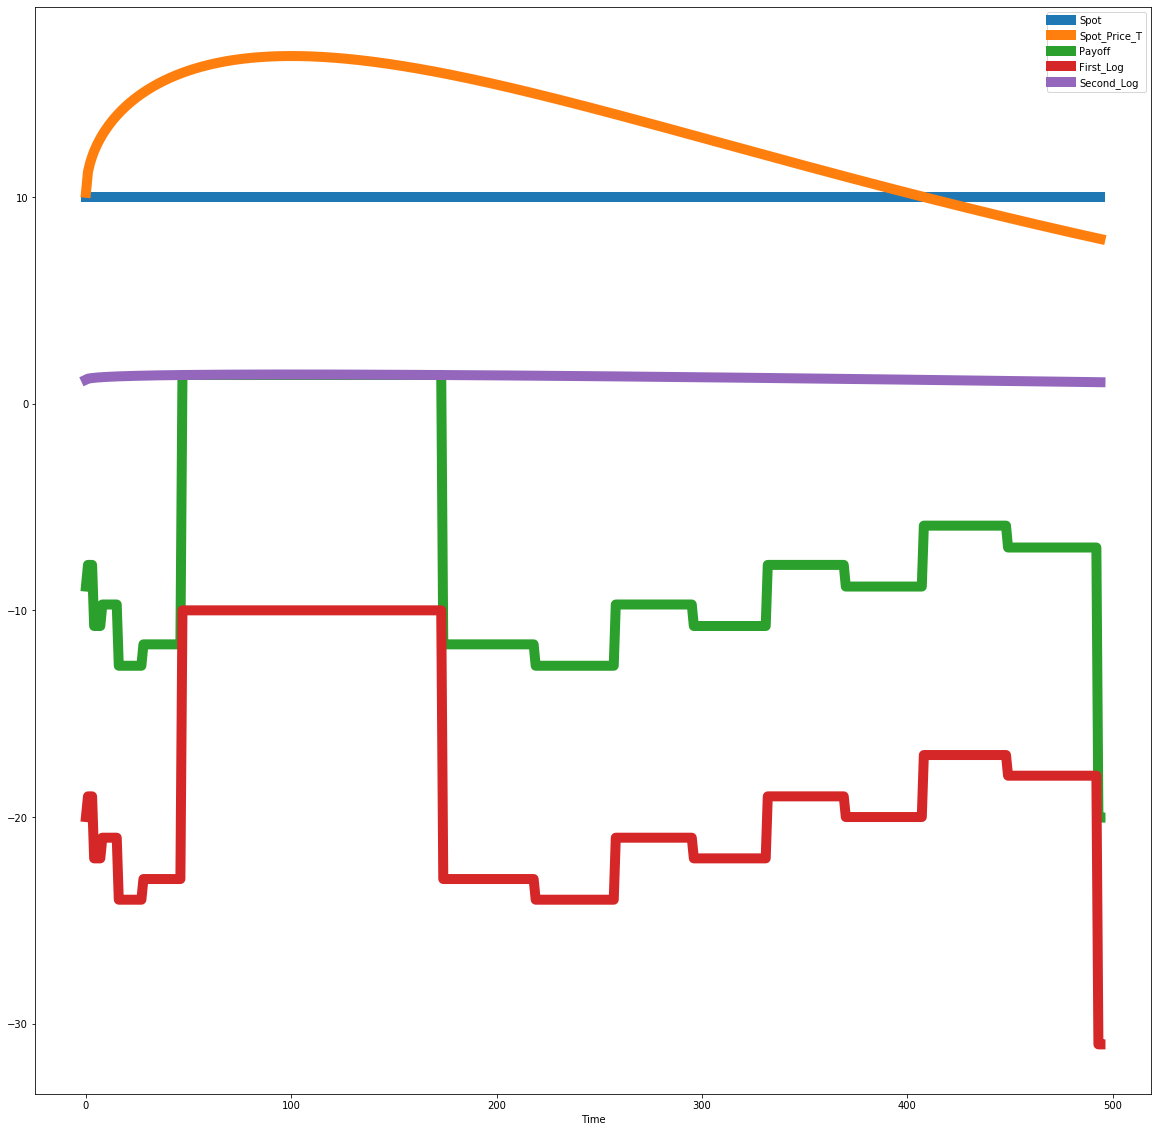

In [53]:
x = np.arange(0,495,1)
c = []
d = []
t = []
for i in x:
    d = 10
    a = blackschole_stock_pricing(10,0.02,0.10,i)
    c.append([i,d,a])
df_ =pd.DataFrame(c)
df_ =df_.rename(columns = { 0:"Time",1 : "Spot",2 :"Spot_Price_T"})
#df_["Spot_Price_T"] =df_["Spot_Price_T"].astype("int64")
df_["Payoff"] = df_["Spot_Price_T"].astype("int64").apply(lambda x : payoffFunction(x))
df_["First_Log"] = df_["Spot_Price_T"].astype("int64").apply(lambda x : (x)^3  * 10^(-8) )
df_["Second_Log"] = df_["Spot_Price_T"].apply(lambda x : ((0.5  * np.log(x))))
df_.set_index("Time", inplace = True)
df_.plot(figsize = (20,20),linewidth =10)

In [50]:
df_

,Spot,Spot_Price_T,Payoff,First_Log,Second_Log
Time,,,,,
0,10,10.202013,-8.848707,-20,1.161293
1,10,11.218734,-7.801052,-19,1.208793
2,10,11.634868,-7.801052,-19,1.227003
3,10,11.950704,-7.801052,-19,1.240395
4,10,12.214028,-10.757547,-22,1.251293
5,10,12.443419,-10.757547,-22,1.260596
6,10,12.648442,-10.757547,-22,1.268767
7,10,12.834800,-10.757547,-22,1.276080
8,10,13.006221,-9.717525,-21,1.282714


In [ ]:
x = np.arange(10,100,1)
c = []
d = []
t = []
for i in x:
    d = 10
    a = payoffFunction(i)
    j = (i)^3  * 10^(-8)
    k = (0.5  * np.log(i))
    c.append([i,j,k,d,a])
df_ = pd.DataFrame(c)

In [47]:
(-11.645975)^3  * 10^(-8)

TypeError: unsupported operand type(s) for ^: 'float' and 'int'

In [ ]:
df_[["Payoff_1","Payoff_2","Payoff_3","Final"]].plot()

In [ ]:
df_BlackScholes_Spot_Price.reset_index().rename( columns = {"time":"Current_Spot_Price"} )

In [ ]:
df_BlackScholes_Spot_Price